In [1]:
using PyPlot
include("utils.jl");

$$\Psi(x)=e^{-\lambda x^2+bx}\sum_{\{h\}}e^{(c+xW)h}=e^{-\lambda x^2+bx}\prod_{j}^{N_h}(1+e^{c_j+xW_j})$$

In [2]:
function Hermite(x,n)
    if n == 0
        return 1
    elseif n == 1
        return 2*x
    else
        return 2*x*Hermite(x,n-1) - 2*(n-1)*Hermite(x,n-2) # Recurrence relation of Hermite polynomials
    end
end

Hermite (generic function with 1 method)

In [3]:
function Ψ_exact(x,n)
    return 1/sqrt(2^n*factorial(n))*π^(-1/4)*Hermite(x,n)*exp(-x^2/2)
end

Ψ_exact (generic function with 1 method)

In [4]:
"""Constants in the test"""

λ = 0.5
b = 0.0
N_h = 16
c = -Complex.(zeros(N_h))
# w = [(0. +1im),(0. +1im)]
;

In [5]:
# generate symetric random w such that w_j~N(0,1)

half_w = Complex.(randn(Int32(N_h//2)), randn(Int32(N_h//2)))
# a = 1.0
# b = 1.0
# c = -1.0
# d = -1.0
# # half_w = [(a +b*1im),(c + d*1im)]
# half_w = [1.599 - 0.431im, 1.191 - 0.18im]
#half_w = [-1.005, 1.045, 0.176, -0.329, 1.599, 0.02, -0.393, 1.393]

w = Complex.(vcat(half_w, -half_w));

# range of the domain
xmin = -10
xmax = 10
n = 10000
x = range(xmin, stop = xmax, length = n)
dx = x[2]-x[1]

# compute the trial wf
y = Complex.(ones(n))
for i = 1:n
    y[i] = Ψ_G(x[i], λ, b, c, w)
end

# compute the trial wf energy
E = round(energy(λ, b, c, w,xmin, xmax, n ), digits=3)


# use the same methods to compute the exact ground state wf λ=0.5, b=0, c=0, w=0
y_analytic = Complex.(ones(n))
for i = 1:n
    y_analytic[i] = Ψ_G(x[i], 0.5, 0., 0., 0.)
end

# compute the exact ground state wf energy
E_a = round(energy(0.5, 0., 0., 0.), digits=3)

# Calculate the probability of the trial wf and the exact wf
prob = abs.(y).^2/(sum(abs.(y).^2)*dx)
analytic_prob = abs.(y_analytic).^2/sum(abs.(y_analytic).^2)

10000-element Vector{Float64}:
 4.1980760389583124e-47
 4.3694027704785164e-47
 4.547685089577091e-47
 4.733203889955306e-47
 4.926251348042721e-47
 5.127131373722531e-47
 5.336160078965798e-47
 5.553666265076438e-47
 5.779991929287176e-47
 6.015492791466958e-47
 ⋮
 5.779991929287176e-47
 5.553666265076438e-47
 5.336160078965798e-47
 5.127131373722531e-47
 4.926251348042721e-47
 4.733203889955306e-47
 4.547685089577091e-47
 4.3694027704785164e-47
 4.1980760389583124e-47

In [6]:
using ProgressMeter

# <span style="color:red">Codi Ferran</span>

In [35]:
xmin = -10
xmax = 10
n    = 10000
x    = range(xmin, stop = xmax, length = n)
dx   = x[2]-x[1]

Ψ2   = Ψ_exact.(x,2)

λ = 0.5
b = 0.0
N_h = 4
c = -Complex.(zeros(N_h))

w_best      = zero(w)

Niter       = 30000
half_Nh     = div(N_h,2)

Err         = Inf
# if !isdir("out/vecs")
#     mkdir("out/vecs")
# end
# if !isdir("out/figs")
#     mkdir("out/figs")
# end
@showprogress for it in 1:Niter
# for it in 1:Niter
    half_w  = randn(ComplexF32,half_Nh)
    w       = vcat(half_w, -half_w)
    
    y = Complex.(ones(n))
    for i = 1:n
        y[i] = Ψ_G(x[i], λ, b, c, w)
    end
    
    y       /= (sum(abs2.(y))*dx)

    # make y antisymmetric

    # y = 0.5*(y - reverse(y))

    # cla()
    # plot(x, abs2.(y), label="Trial wf")
    # savefig("out/figs/$it.png")

    # open("out/vecs/$it.txt", "a") do io
    #     println(io, w)
    # end


    Err_n   = sum(abs2.(y.-Ψ2)) # squared distance to the analytic wf

    # Err_n = energy_from_wf(y,xmin, xmax, n) # energy of the trial wf
    # println(Err_n)
    #print(Err_n," : ")
    if  Err > Err_n
        Err = Err_n
        w_best = w
        # println("# ϵ = ",Err_n)
    end
end

w_best

4-element Vector{ComplexF32}:
 -0.06807527f0 - 0.16265583f0im
   1.6243333f0 + 0.0057362635f0im
  0.06807527f0 + 0.16265583f0im
  -1.6243333f0 - 0.0057362635f0im

In [36]:
energy(λ, b, c, w_best)

1.1667142523070362

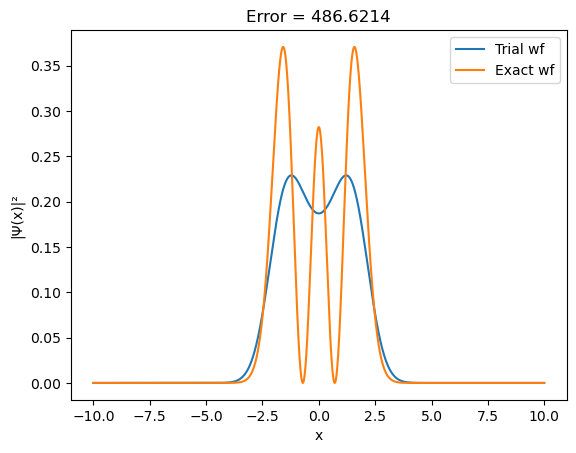

In [37]:
clf()
y = Complex.(ones(n))
    for i = 1:n
        y[i] = Ψ_G(x[i], λ, b, c, w_best)
    end
    
y       = abs2.(y)/ (sum(abs2.(y))*dx)
plot(x, y, label="Trial wf")
Ψ_e = abs2.(Ψ_exact.(x,2))
plot(x, Ψ_e, label="Exact wf")
legend()
xlabel("x")
ylabel("|Ψ(x)|²")
title("Error = $(round(Err,digits=4))")

display(gcf())

In [23]:
randn(ComplexF32, 4)

4-element Vector{ComplexF32}:
 -0.7453665f0 - 0.34681776f0im
 -0.9279501f0 + 0.0019294901f0im
 0.78503215f0 - 0.09476694f0im
  0.5654415f0 - 0.53218037f0im

In [ ]:
energy_from_wf(Ψ_exact.(x,1),xmin, xmax, n)

In [ ]:
P2 = Ψ_exact.(x,2).^2
sum(prob)*(x[2]-x[1])

In [ ]:
clf()
plot(x,prob)
plot(x,P2)
display(gcf())

In [ ]:
p1 = plot()

# title = "Ψ_G(x) for \n b = $b, \nc=$c, \nw=$w"

plot!(x, prob, label = "abs(Ψ_G(x))", xlabel = "x", ylabel = "Ψ_G(x)", title = "Analytic vs trial comparison\n E_trial=$E", lw = 4)
plot!(x, analytic_prob, label = "abs(Ψ_G(x)) analytic", lw = 2)

p2 = plot()

plot!(x[1:end-1],df(prob), label = "rng", lw = 4, title="dΨ_G(x)/dx", ylabel="dΨ_G(x)/dx", xlabel="x")
plot!(x[1:end-1],df(analytic_prob), label = "analytic", lw = 2)

p3 = plot()

plot!(x, real.(y)./sum(abs.(y).^2), label = "real(Ψ_G(x))", lw = 4, xlabel="x", ylabel="Ψ_G(x) (re or im)", title="Ψ_{trial} decomposition")
# plot!(x, real.(y_analytic)./sum(abs.(y_analytic).^2), label = "real(Ψ_G(x)) analytic", lw = 2)
plot!(x, imag.(y)./sum(abs.(y).^2), label = "imag(Ψ_G(x))", lw = 4)

#plot(p1, p2, p3, layout = (3,1), size = (800, 800))



In [ ]:
println(round.(imag.(w[1:8]),digits=3))

If we want the wf to be symmetric, $N_h$ must be even. On top of that, $W$ must have $N_h$ degrees of freedom. The others are fixed such that $W_{j+N_h}=-W_j\ j=1,2,...,N_h/2$

In [ ]:
energy(λ, b, c, w)

In [ ]:
x_test = range(-10, stop = 10, length = 100000)
y_test = x_test
plot(y_test, label = "x^2", lw = 2)
plot!(df(y_test), label = "dx", lw = 2)

In [ ]:
println(round.(w, digits=3))

In [ ]:
function Hermite(x,n)
    if n == 0
        return 1
    elseif n == 1
        return 2*x
    else
        return 2*x*Hermite(x,n-1) - 2*(n-1)*Hermite(x,n-2) # Recurrence relation of Hermite polynomials
    end
end

In [ ]:
function Ψ_exact(x,n)
    return 1/sqrt(2^n*factorial(n))*π^(-1/4)*Hermite(x,n)*exp(-x^2/2)
end

In [ ]:
x = range(-10, stop = 10, length = 1000)
plot(x, Ψ_exact.(x,0), label = "n=0", lw = 2)
plot!(x, Ψ_exact.(x,1), label = "n=1", lw = 2)
plot!(x, Ψ_exact.(x,2), label = "n=2", lw = 2)
plot!(x, Ψ_exact.(x,3), label = "n=3", lw = 2)


In [ ]:
plot(x, Ψ_exact.(x,0).^2, label = "n=0", lw = 2)
plot!(x, Ψ_exact.(x,1).^2, label = "n=1", lw = 2)
plot!(x, Ψ_exact.(x,0), label = "n=0", lw = 2)
plot!(x, Ψ_exact.(x,1), label = "n=1", lw = 2)
# plot!(x, Ψ_exact.(x,2).^2, label = "n=2", lw = 2)
# plot!(x, Ψ_exact.(x,3).^2, label = "n=3", lw = 2)

In [ ]:
using Zygote

In [ ]:
function ∇f(f,x)
    return gradient(x->f(x),x)
end

using Plots

x_range = Array(range(-10, stop = 10, length = 10))

∇f.(x->x^2,x_range)

# plot(x_range, x->x^2, label = "x^2", lw = 2)


# plot!(x_range, ∇f.(x->x^2,x_range), label = "dx", lw = 2)

# plot!(x_range, x->2*x, label = "2x", lw = 2)

In [ ]:
x = [1.,1.,2.]

x |> sum |> sqrt

In [ ]:
function σ(x)
    return 1/(1+exp(-x))
end

function energy(λ, b, c, w, xmin=-10, xmax=10, n=100000)
    x_vec = range(xmin, xmax, length=n)
    h = sum(x[2:end].-x[1:end-1])/(length(x)-1)
    dx = x_vec[2]-x_vec[1]
    y = Complex.(ones(n))
    for i = 1:n
        y[i] = Ψ_G(x_vec[i], λ, b, c, w)
    end
    probability = abs.(y).^2/(sum(abs.(y).^2)*dx)

    d2ψ = 

    d2ψ(x) = hessian(x->Ψ_G(x,λ,b,c,w),x) # second derivative
    Tloc = -0.5.*d2ψ.(x_vec) ./ y # local kinetic energy
    Vloc =  (0.5 .*x_vec.^2) # local potential energy
    Eloc =  (Tloc + Vloc) # local energy
    return real(Simpson(probability .* Eloc,h) / Simpson(probability,h)) # expectation value of the energy
end

In [ ]:
y = ψ
    return 2. * λ * (λ * x^2. - 1.) - 3. * λ * x*(wsigma+b)+b^2+2*b*wsigma+w2sigma+non_diag 
end

In [ ]:
kinetic_factor(0.0,λ,b,c,w)

In [ ]:
function E_loc_analytic(x,λ,b,c,w)
    return x^2 - kinetic_factor(x,λ,b,c,w)
end

In [ ]:
function energy2(λ, b, c, w, position=0.0, xmin=-10, xmax=10, n=100000)
    x_vec = range(xmin, xmax, length=n)
    h = sum(x[2:end].-x[1:end-1])/(length(x)-1)
    probability = abs2.(Ψ_G.(x_vec, λ, b, c, w))
    Eloc =  E_loc_analytic.(x_vec,λ,b,c,w)
    return real(Simpson(probability .* Eloc,h) / Simpson(probability,h)) # expectation value of the energy
end

In [ ]:
energy2(0.5,0.,0.,0.)

In [ ]:
x = range(-10, stop = 10, length = 100000)
plot(x,x->Ψ_G(x, 0.5, 0., 0., 0.), title="energy = $(energy2(0.5, 0., [0.], [0.]))", lw = 2)

In [ ]:
gradient(λ->energy(λ,0.,0.,0.), 0.5)